In [1]:
!pip install pint

# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
import math

print('If this cell runs successfully, it produces no output other than this message.')

If this cell runs successfully, it produces no output other than this message.


In [2]:
sweep = SweepSeries()
bikeshare = State(olin= 0, wellesley= 0, 
                  olin_empty=0, wellesley_empty=0,
                  clock=0, total_money = 0)

,values
olin,0
wellesley,0
olin_empty,0
wellesley_empty,0
clock,0
total_money,0


In [3]:
def bike_to_wellesley(state):
    state.clock+=1
    if state.olin == 0:
        #print("No bike at olin "+ str(state.total_money))
        return
    else:
        #print("Moving from olin to wellesley "+ str(state.total_money))
        state.olin -= 1
        state.wellesley += 1
        state.total_money+=10
    
def bike_to_olin(state):
    state.clock+=1
    if state.wellesley == 0:
        #print("No bike at wellesley "+ str(state.total_money))
        return
    else:
        #print("Moving from wellesley to olin "+ str(state.total_money))
        state.wellesley -= 1
        state.olin += 1
        state.total_money+=10

In [4]:
def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)

In [5]:
def run_simulation(state, p1, p2, num_steps, num_bikes):
    """Simulate the given number of time steps.
    
    state: State object
    p1: probability of a bike moving from Olin -> Wellesley
    p2: probability of a bike moving from Wellesley -> Olin
    num_steps: number of time steps
    """
    state.olin= math.ceil(num_bikes/2)
    state.wellesley= math.floor(num_bikes/2)
    
    for i in range(num_steps):
        step(state,p1,p2)
    
        

In [6]:
number_of_bikes = linspace(10, 500, 50)

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180., 190., 200., 210., 220.,
       230., 240., 250., 260., 270., 280., 290., 300., 310., 320., 330.,
       340., 350., 360., 370., 380., 390., 400., 410., 420., 430., 440.,
       450., 460., 470., 480., 490., 500.])

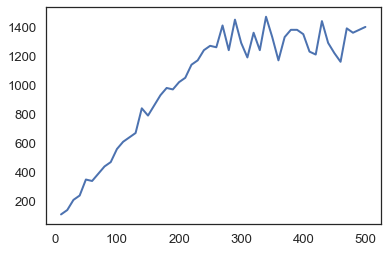

In [7]:
for x in number_of_bikes:
    state = run_simulation(bikeshare, 0.09, 0.002, 1440,int(x))
    sweep[x] = bikeshare.total_money
    bikeshare.total_money = 0
          
plot(sweep, label = 'bikeshare.total_money')

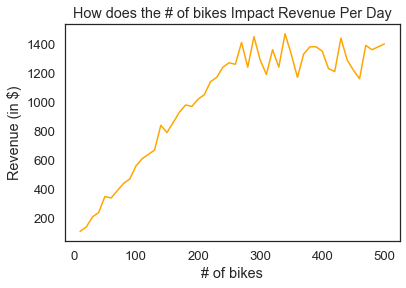

In [8]:
plt.plot(number_of_bikes,sweep, color='orange')
plt.xlabel('# of bikes')
plt.ylabel("Revenue (in $)")
plt.title('How does the # of bikes Impact Revenue Per Day')
plt.show()